<a href="https://colab.research.google.com/github/criselsuarez/MinXSS_DAXSS_Tutorial/blob/main/MinXSS_Data_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello and welcome to the MinXSS/DAXSS Data tutorial



In [113]:
#Installing dependencies
!pip install matplotlib scipy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
# Importing all required Python Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.idl import readsav
import pandas as pd
import matplotlib.dates as mdates



# MinXSS DATA 

## DATA

In [115]:
# Getting the data
# Data available at https://lasp.colorado.edu/home/minxss/data/
!wget -O minxss1_l1_mission_length_v3.1.0.sav -cq https://www.dropbox.com/s/8nzfmenevezy3t6/minxss1_l1_mission_length_v3.1.0.sav?dl=0


data_level_1 = readsav('/content/minxss1_l1_mission_length_v3.1.0.sav')
level1_1min_minxss = data_level_1.copy()



In [116]:
#MinXSS Data Structure
#Shows the tags and meta data for the different intruments on board MinXSS-1
(level1_1min_minxss['minxsslevel1']).dtype


dtype((numpy.record, [(('x123', 'X123'), 'O'), (('x123_meta', 'X123_META'), 'O'), (('x123_dark', 'X123_DARK'), 'O'), (('xp', 'XP'), 'O'), (('xp_meta', 'XP_META'), 'O'), (('xp_dark', 'XP_DARK'), 'O')]))

In [117]:
#MinXSS Data X123 Structure
minxss_level1_df = pd.DataFrame.from_records(level1_1min_minxss['minxsslevel1']['x123'][0])

In [118]:
#MinXSS Tag Names 
#Use X123_SLOW_COUNT for time series analysis (counts/sec)
#Use IRRADIANCE for spectra analysis (photons / sec / cm$^2$ / keV)
print(minxss_level1_df.keys())

Index(['TIME', 'FLIGHT_MODEL', 'IRRADIANCE', 'IRRADIANCE_UNCERTAINTY',
       'ENERGY', 'SPECTRUM_CPS', 'SPECTRUM_CPS_ACCURACY',
       'SPECTRUM_CPS_PRECISION', 'SPECTRUM_CPS_STDDEV',
       'DEADTIME_CORRECTION_FACTOR', 'VALID_FLAG', 'X123_RADIO_FLAG',
       'SPECTRUM_TOTAL_COUNTS', 'SPECTRUM_TOTAL_COUNTS_ACCURACY',
       'SPECTRUM_TOTAL_COUNTS_PRECISION', 'INTEGRATION_TIME', 'NUMBER_SPECTRA',
       'X123_FAST_COUNT', 'X123_SLOW_COUNT', 'SPS_ON', 'SPS_SUM', 'SPS_X',
       'SPS_Y', 'SPS_X_HK', 'SPS_Y_HK', 'LONGITUDE', 'LATITUDE', 'ALTITUDE',
       'SUN_RIGHT_ASCENSION', 'SUN_DECLINATION', 'EARTH_SUN_DISTANCE',
       'CORRECT_AU'],
      dtype='object')


In [119]:
#MinXSS Time Structure

index = 10 

print(minxss_level1_df['TIME'][index].dtype)

print(minxss_level1_df['TIME'][index]['human'][0].decode("utf-8"))

(numpy.record, [(('iso', 'ISO'), 'O'), (('human', 'HUMAN'), 'O'), (('yyyymmdd', 'YYYYMMDD'), '>i4'), (('yyyydoy', 'YYYYDOY'), '>i4'), (('hhmmss', 'HHMMSS'), 'O'), (('sod', 'SOD'), '>i4'), (('fod', 'FOD'), '>f8'), (('jd', 'JD'), '>f8'), (('tai', 'TAI'), '>f8'), (('spacecraftgpsformat', 'SPACECRAFTGPSFORMAT'), '>f8')])
2016-06-09 08:14:51


In [120]:
#Convert All Times

minxss_time_lvl1_array = np.array([])

for time_index in range(len(minxss_level1_df['TIME'])):
  #minxss_time = minxss_level1_df['TIME'][time_index]['HUMAN'][0].decode("utf-8")
  minxss_time = pd.to_datetime(minxss_level1_df['TIME'][time_index]['HUMAN'][0].decode("utf-8"))
  minxss_time_lvl1_array = np.append(minxss_time_lvl1_array, minxss_time)



## Time Series

Use X123_SLOW_COUNT tag. 
X123 has units of counts per seconds


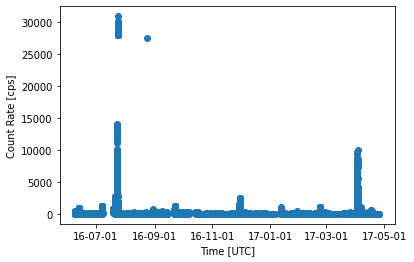

In [121]:
#Plot all of MinXSS-1 mission 
fig, ax = plt.subplots(1)
ax.plot(minxss_time_lvl1_array, minxss_level1_df['X123_SLOW_COUNT'], 'o')
ax.set_xlabel('Time [UTC]')
ax.set_ylabel('Count Rate [cps]')
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))


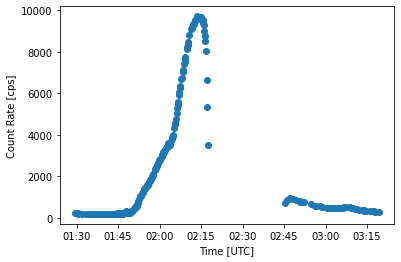

In [122]:
#Plot Time Series Flare
fig, ax = plt.subplots(1)
ax.plot(minxss_time_lvl1_array[3900:4150], minxss_level1_df['X123_SLOW_COUNT'][3900:4150], 'o')
ax.set_xlabel('Time [UTC]')
ax.set_ylabel('Count Rate [cps]')
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))




In [123]:
minxss_time_lvl1_array[4050]

Timestamp('2016-07-23 02:04:31')

## Spectra

Use Energy and Irradiance tags. 
Irradiance has units of [photons / sec / cm$^2$ / keV] and Energy has units of keV


Text(0.5, 1.0, 'Spectrum at 2016-07-23 02:04:31')

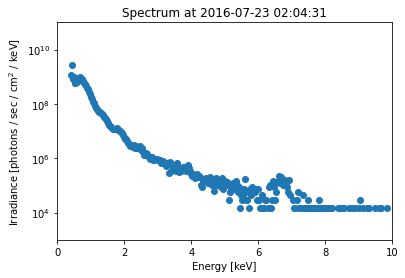

In [124]:
fig, ax = plt.subplots(1)
ax.plot( minxss_level1_df['ENERGY'][4050], minxss_level1_df['IRRADIANCE'][4050], 'o')
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Irradiance [photons / sec / cm$^2$ / keV]')
ax.set_xlim([0,10])
ax.set_ylim([1e3, 1e11])
ax.set_yscale('log')
ax.set_title('Spectrum at ' + str(minxss_time_lvl1_array[4050]))